

### SVD图像压缩原理

奇异值分解（Singular Value Decomposition，简称SVD）是一种在线性代数和数值分析中常用的矩阵分解方法。SVD 对于图像压缩的原理主要涉及到矩阵的低秩近似。

1. **原理概述：** 给定一个矩阵 $ A $，SVD 将其分解为三个矩阵的乘积，即：$ A = U \Sigma V^T $。其中，$ U $ 和 $V $ 是正交矩阵，$\Sigma $ 是对角矩阵，对角线上的元素称为奇异值。在图像处理中，通常使用 SVD 对图像矩阵进行分解，SVD分解具体流程如下图所示：

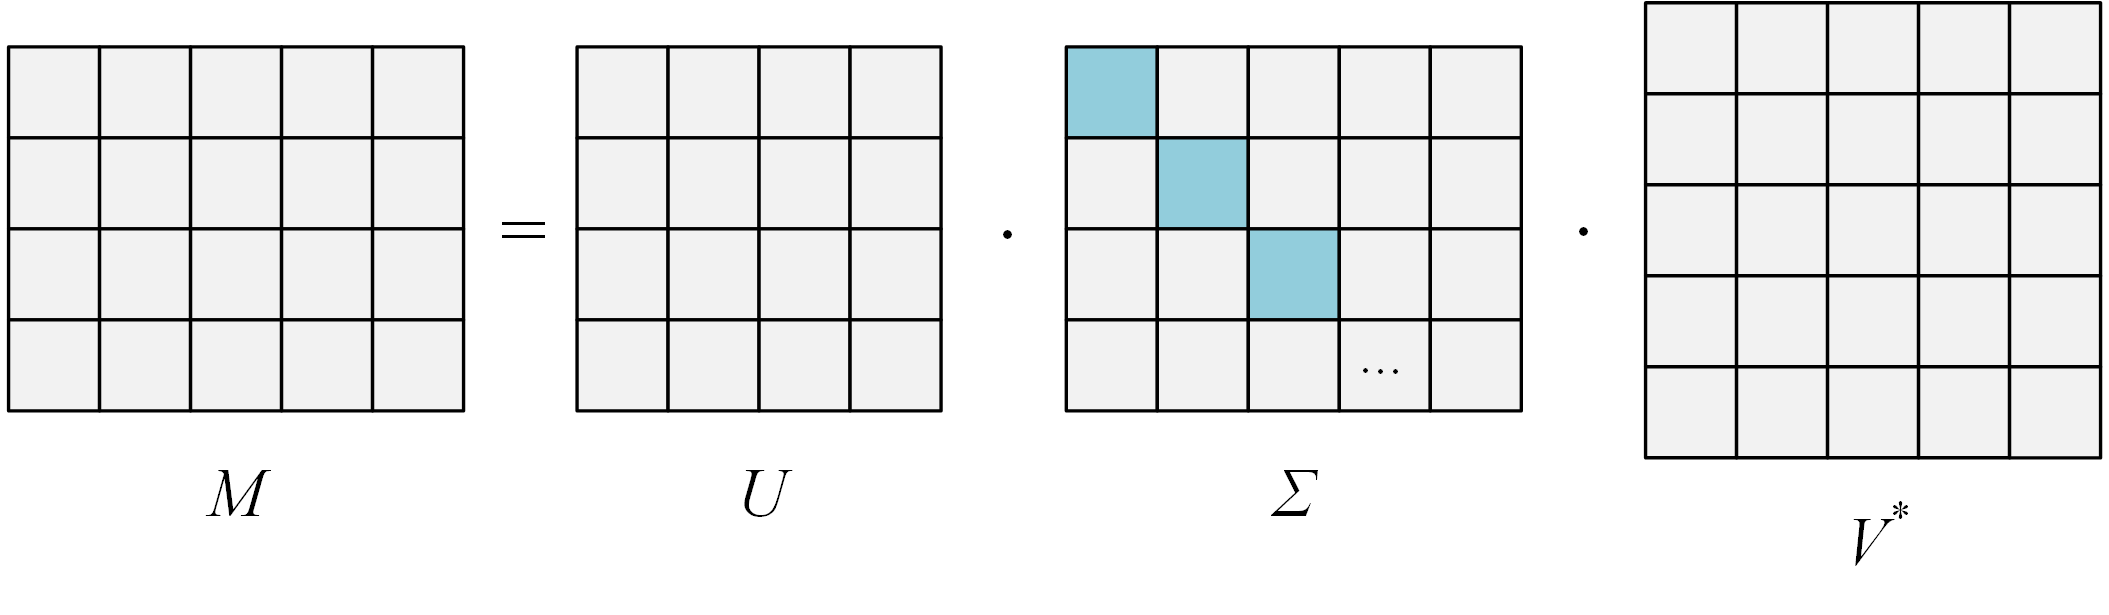

2. **奇异值的作用：** 奇异值代表了矩阵的重要性，奇异值较大的方向表示矩阵中的主要特征。通过保留较大的奇异值，我们可以得到原始矩阵的一个低秩近似。

3. **图像压缩步骤：** 对于图像压缩，一般步骤如下：

   - **SVD分解：** 对图像矩阵进行 SVD 分解，得到 \( U, \Sigma, V^T \)。
   
   - **奇异值截断：** 保留奇异值中最大的前几个，将其他奇异值置零。这相当于在 \( \Sigma \) 中只保留主要的对角元素，将其他元素置零。

   - **重构图像：** 将截断后的 \( U, \Sigma, V^T \) 重新相乘，得到一个低秩近似的图像矩阵。

   - **压缩比例：** 压缩比例由保留的奇异值个数决定，可以通过调整保留的奇异值个数来控制图像的压缩比。




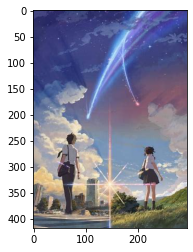

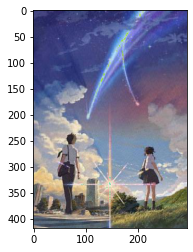

In [44]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


class ImageCompressor:
    def __init__(self, image_path, k):
        self.image_path = image_path
        self.k = k  

    def load_image(self):
        img = Image.open(self.image_path)
        self.image_array = np.array(img)
        self.shape = self.image_array.shape

    def compress_image(self):

        reshaped_image = self.image_array.reshape(self.shape[0], -1)
        U, S, Vt = np.linalg.svd(reshaped_image, full_matrices=False)

        #BLANK 选取前k个奇异值和特征来重构图片，并恢复成与原图片相同大小
        compressed_image = np.dot(U[:,:self.k], np.dot(np.diag(S[:self.k]), Vt[:self.k,:]))
        compressed_image = compressed_image.reshape(self.shape)


        return compressed_image
    
    def svd(self):
        reshaped_image = self.image_array.reshape(self.shape[0], -1)
        U, S, Vt = np.linalg.svd(reshaped_image, full_matrices=False)
        return U,S,Vt
    
    def compress_image_yourself(self):
        #BLANK 选取前k个奇异值和特征来重构图片，并恢复成与原图片相同大小
        U,S,Vt = self.svd()
        compressed_image = np.dot(U[:,:self.k], np.dot(np.diag(S[:self.k]), Vt[:self.k,:]))
        compressed_image = compressed_image.reshape(self.shape)
        return compressed_image
    #将图片保存到指定路径
    def save_compressed_image(self, output_path):
        #compressed_image = self.compress_image()
        compressed_image = self.compress_image_yourself()
        img = Image.fromarray(compressed_image.astype(np.uint8))
        img.save(output_path)
        



if __name__ == "__main__":
    # Example usage
    image_path = "input.jpg"
    output_path = "output.jpg"

    k_value = 100  #选取的奇异值数量

    compressor = ImageCompressor(image_path, k_value)
    compressor.load_image()
    compressor.save_compressed_image(output_path)

    origin_image = plt.imread(image_path)
    plt.imshow(origin_image)
    plt.show()
    compressed_image = plt.imread(output_path)
    plt.imshow(compressed_image)
    plt.show()



# 实验结果
原图效果：

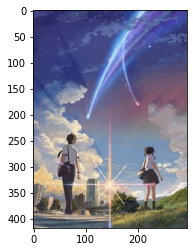

## Numpy自带SVD
首先是使用Numpy的SVD进行实验，结果如下：
k = 1压缩效果:

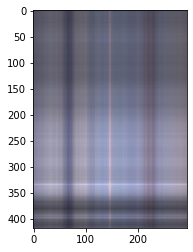

可见，此时图片已被压缩至无法辨认，清晰度完全降低。

k = 5压缩效果：

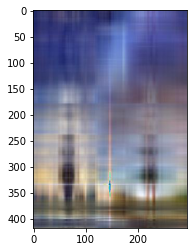

k=5时，图片清晰度依然较低

k = 10压缩效果：

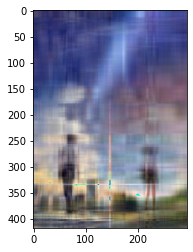

此时图片可以依稀辨认，但清晰度相比原图依然大大降低。

下面使用步长10对k进行增大，对比压缩效果：

k = 20:

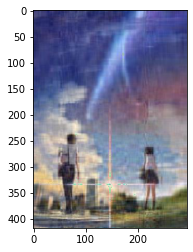

k = 30:

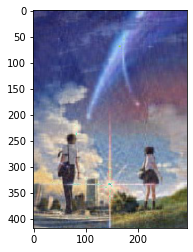

k = 40:

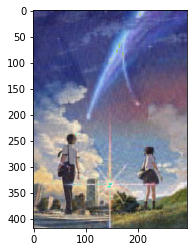

k = 50:

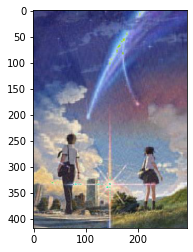

k = 60:

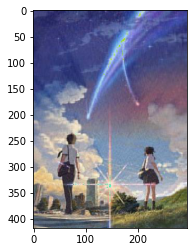

k = 70:

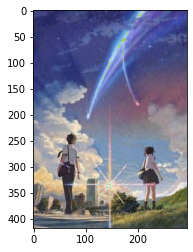

k = 80:

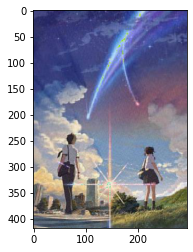

k = 90:

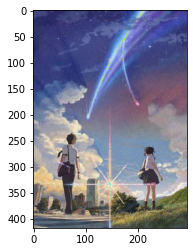

k = 100:

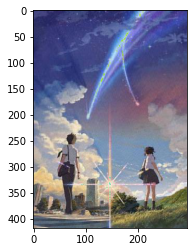


## 自己的SVD

k = 1:

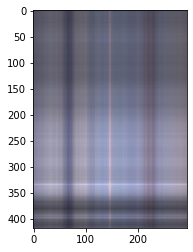

k = 5:

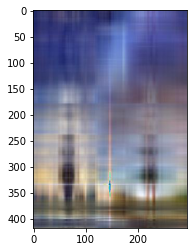

k = 10:

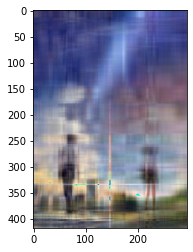

k = 20:

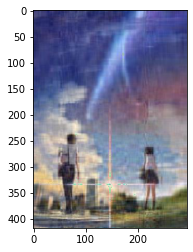

k = 30:

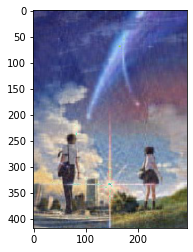

k = 40:

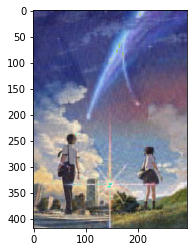

k = 50:

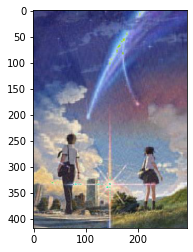

k = 60:

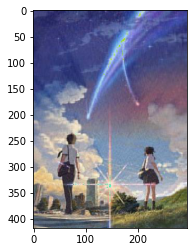

k = 70:

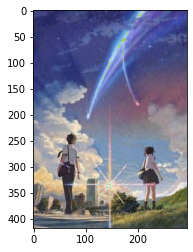

k = 80:

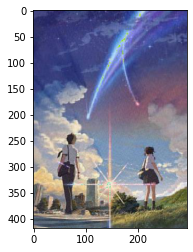

k = 90:

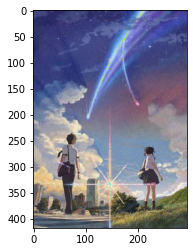

k = 100:

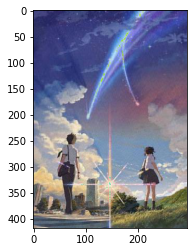

$\qquad$ 可见，自己写的SVD压缩效果较为理想，与Numpy库的SVD压缩算法达到了大致相同的压缩效果，较好地对图片进行了压缩。

## 总结：

$\qquad$ 由于SVD分解压缩是选取前k个奇异值，即可以近似理解为选取k个图像主要特征，可见，随着k增大，使用的特征变多，压缩程度越低，图片的质量增高，随着k减小，使用的特征减少，压缩程度提高，图片质量降低，实验结果验证了这一点。但是在实际应用中，不仅要考虑压缩程度，还要考虑图像信息的真实性和可恢复性，因此在实际应用场景中，应选取合理的k值，既要对图片进行压缩，又要保证图片不严重失真，影响重要信息获取。

$\qquad$ 综上所述，SVD 图像压缩的优点是能够保留图像的主要特征，对于一些图像，保留较少的奇异值就能获得相对清晰的图像。缺点是在某些情况下可能丢失一些细节信息。

